<h1 align=center> Hyperparameters Tunning And Cross Validation In Depth</h1>

- Hyperparameter tuning and cross-validation are fundamental techniques in machine learning that, when combined, provide a powerful approach to developing robust and high-performing models.
- Applying these techniques can significantly enhance model generalization, prevent overfitting, and ensure that the model performs well on new, unseen data.

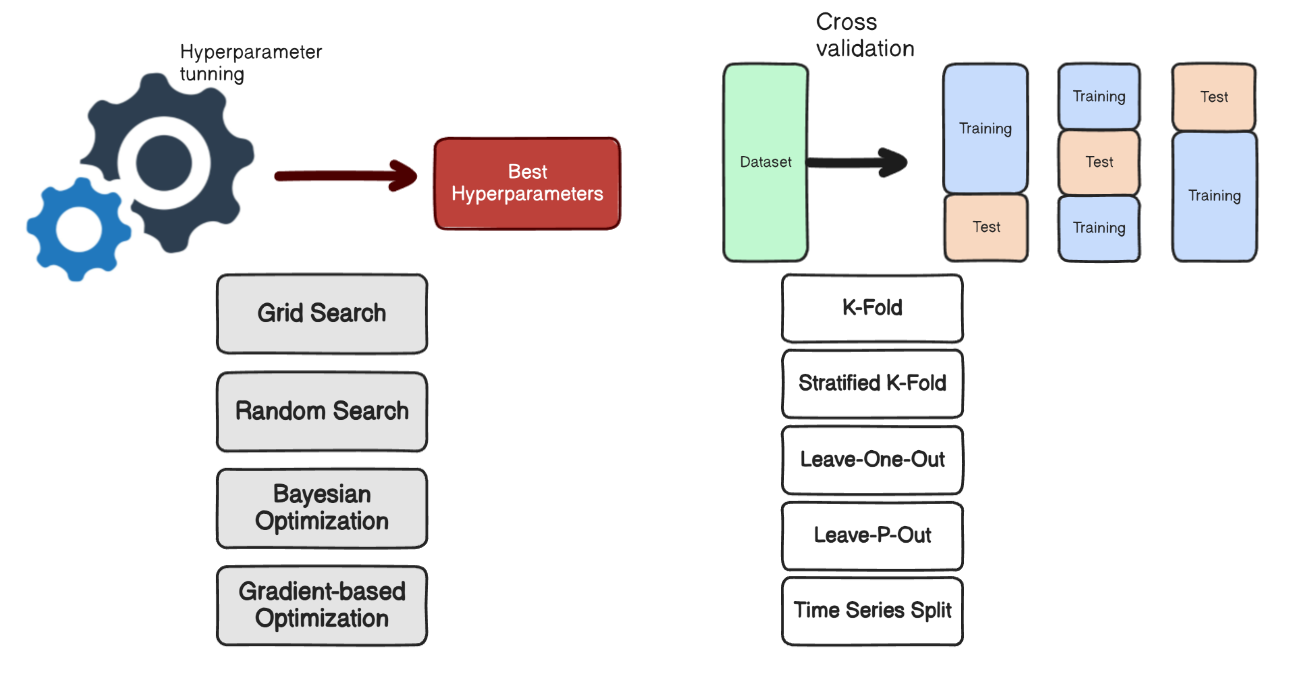

### Hyperparameters Tuning

- Hyperparameters are configuration settings used to control the learning process
- Unlike parameters (which are learned during training), hyperparameters are set before the training process begins.
- Examples include learning rate, number of trees in a random forest, and the number of layers in a neural network

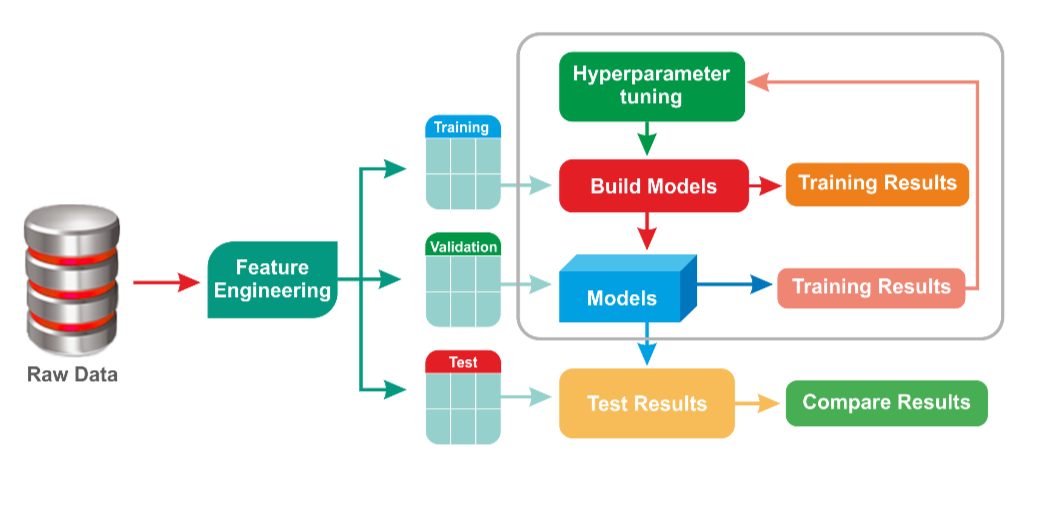

### Why Tuning is Important

1. **Model Performance**: Properly tuned hyperparameters can significantly enhance the model's performance.
2. **Bias-Variance Tradeoff**: Tuning helps in finding a balance between underfitting (high bias) and overfitting (high variance).
3. **Efficiency**: Optimal hyperparameters ensure that the model trains efficiently, saving time and computational resources.

### Common Hyperparameters

- **Learning Rate**: Controls the step size during gradient descent.
- **Batch Size**: Number of samples processed before the model is updated.
- **Number of Epochs**: How many times the learning algorithm will work through the entire training dataset.
- **Regularization Parameters**: Like L1 and L2 penalties.
- **Model-specific parameters**: Number of layers in a neural network, number of trees in a random forest, etc.

### Tuning Methods

**1. Grid Search**: 

- Exhaustive search over a specified parameter grid
- Comprehensive but computationally expensive
    
    ```python
    # **Grid Search Example with Scikit-Learn**
    from sklearn.model_selection import GridSearchCV
    from sklearn.ensemble import RandomForestClassifier
    
    # Define model
    model = RandomForestClassifier()
    
    # Define parameter grid
    param_grid = {
        'n_estimators': [10, 50, 100],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }
    
    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
    
    # Fit the model
    grid_search.fit(X_train, y_train)
    
    # Best parameters
    print(grid_search.best_params_)
    print(grid_search.best_score_)
    ```
    

**2. Random Search**: 

- Randomly samples parameter values
- More efficient than grid search, especially with large search spaces
    
    ```python
    # **Randomized Search Example with Scikit-Learn**
    from sklearn.model_selection import RandomizedSearchCV
    from sklearn.ensemble import RandomForestClassifier
    from scipy.stats import randint
    
    # Define model
    model = RandomForestClassifier()
    
    # Define parameter distribution
    param_dist = {
        'n_estimators': randint(10, 200),
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': randint(2, 11)
    }
    
    # Initialize RandomizedSearchCV
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)
    
    # Fit the model
    random_search.fit(X_train, y_train)
    
    # Best parameters and score
    print(random_search.best_params_)
    print(random_search.best_score_)
    ```
    

**3. Bayesian Optimization**: 

- Uses a probabilistic model to find the best parameters
- Efficient for expensive-to-evaluate functions but can be complex to implement
    
    ```python
    # **Bayesian Optimization Example with Scikit-Optimize**
    from skopt import BayesSearchCV
    from sklearn.ensemble import RandomForestClassifier
    
    # Define model
    model = RandomForestClassifier()
    
    # Define parameter search space
    search_space = {
        'n_estimators': (10, 200),
        'max_depth': (1, 50),
        'min_samples_split': (2, 10)
    }
    
    # Initialize BayesSearchCV
    bayes_search = BayesSearchCV(estimator=model, search_spaces=search_space, n_iter=32, cv=5, scoring='accuracy', random_state=42)
    
    # Fit the model
    bayes_search.fit(X_train, y_train)
    
    # Best parameters and score
    print(bayes_search.best_params_)
    print(bayes_search.best_score_)
    ```
    

**4. Gradient-based Optimization**: 

- Optimizes hyperparameters using gradient descent methods
- Effective when gradients can be computed but requires differentiable objective functions
- Libraries like TensorFlow and PyTorch can be used for this purpose
    
    ```python
    # **Hyperparameter Tuning Example with TensorFlow**
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense
    from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
    from tensorflow.keras.optimizers import Adam
    from sklearn.model_selection import GridSearchCV
    
    # Define the model
    def create_model(learning_rate=0.01):
        model = Sequential()
        model.add(Dense(64, input_dim=20, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        optimizer = Adam(learning_rate=learning_rate)
        model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        return model
    
    # Create KerasClassifier
    model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10, verbose=0)
    
    # Define parameter grid
    param_grid = {
        'learning_rate': [0.01, 0.001, 0.0001]
    }
    
    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
    
    # Fit the model
    grid_search.fit(X_train, y_train)
    
    # Best parameters and score
    print(grid_search.best_params_)
    print(grid_search.best_score_)
    ```
    

### Cross-Validation

- Cross-validation is a technique for assessing how the results of a statistical analysis generalize to an independent dataset. It is mainly used to estimate the skill of a model on new data.

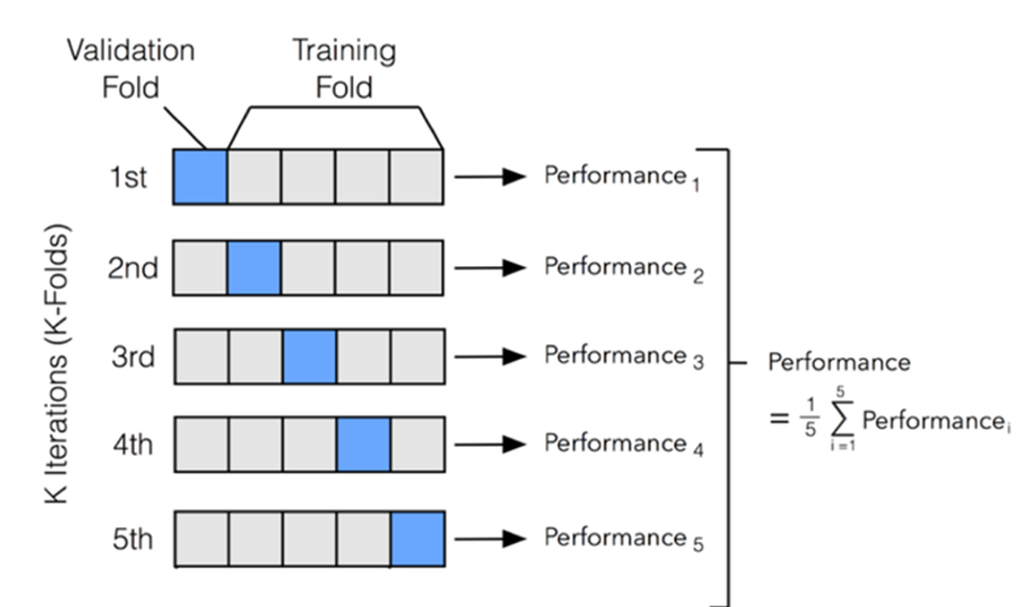

### Types of Cross-Validation

1. **K-Fold Cross-Validation**: The dataset is divided into K subsets (folds). The model is trained on K-1 folds and tested on the remaining fold. This process is repeated K times.
2. **Stratified K-Fold**: Similar to K-Fold but preserves the percentage of samples for each class.
3. **Leave-One-Out Cross-Validation (LOOCV)**: A single observation is used for validation, and the remaining data for training. This process is repeated for each observation.
4. **Leave-P-Out Cross-Validation**: Uses P observations for validation and the remaining for training.
5. **Time Series Split**: For time series data where the order of data points matters.

### Why Use Cross-Validation?

- **Better Model Evaluation**: Provides a more accurate estimate of model performance.
- **Reduces Overfitting**: Ensures the model is not overfitting to a particular subset of data.
- **Hyperparameter Tuning**: Essential for tuning hyperparameters.

### Practical Implementation

```python
# **K-Fold Cross-Validation Example with Scikit-Learn**
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Define model
model = RandomForestClassifier()

# Define K-Fold cross-validation
kf = KFold(n_splits=5)

# Evaluate model
results = cross_val_score(model, X, y, cv=kf)

print(f'Cross-Validation Scores: {results}')
print(f'Mean CV Score: {results.mean()}')
```

---

### Integrating Hyperparameters Tuning with Cross-Validation

Combining hyperparameter tuning with cross-validation ensures that the tuning process accounts for model variability and provides a robust evaluation metric.

```python
# **Grid Search with Cross-Validation Example**
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define model
model = RandomForestClassifier()

# Define parameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and score
print(grid_search.best_params_)
print(grid_search.best_score_)
```